# **Mercedes-Benz Fabricación más Ecológica**

## Descripción

#### Desde el primer automóvil, el Benz Patent Motor Car en 1886, Mercedes-Benz ha sido sinónimo de importantes innovaciones automotrices. Estas incluyen, por ejemplo, la célula de seguridad para pasajeros con zona de deformación, el airbag y los sistemas inteligentes de asistencia. Mercedes-Benz solicita cerca de 2000 patentes al año, lo que convierte a la marca en líder europeo entre los fabricantes de automóviles premium. Los autos de Mercedes-Benz, pertenecientes a Daimler, son líderes en la industria de vehículos de alta gama. Con una amplia selección de características y opciones, los clientes pueden elegir el Mercedes-Benz personalizado de sus sueños.

#### Para garantizar la seguridad y fiabilidad de cada configuración única de automóvil antes de que salgan a la carretera, los ingenieros de Daimler han desarrollado un sistema de pruebas robusto. Sin embargo, optimizar la velocidad de su sistema de pruebas para tantas combinaciones posibles de características es complejo y requiere mucho tiempo sin un enfoque algorítmico poderoso. Como uno de los mayores fabricantes de automóviles premium del mundo, la seguridad y la eficiencia son fundamentales en las líneas de producción de Daimler.

![](../images/daimler-mercedes%20V02.jpg)


#### En esta competencia, Daimler reta a los participantes de Kaggle a abordar la maldición de la dimensionalidad y reducir el tiempo que los autos pasan en el banco de pruebas. Los competidores trabajarán con un conjunto de datos que representa diferentes permutaciones de características de los automóviles Mercedes-Benz para predecir el tiempo que toma aprobar las pruebas. Los algoritmos ganadores contribuirán a agilizar las pruebas, lo que resultará en menores emisiones de dióxido de carbono sin reducir los estándares de Daimler.


---

## **Evaluación**


### Las entregas se evaluarán según el valor R^2, también llamado coeficiente de determinación.

---

## Descripción del Conjunto de Datos

#### El conjunto de datos contiene un conjunto anonimizado de variables, cada una representando una característica personalizada en un automóvil Mercedes. Por ejemplo, una variable podría ser tracción en las cuatro ruedas (4WD), suspensión neumática adicional o una pantalla de visualización frontal (head-up display).

#### La variable de referencia está etiquetada como 'y' y representa el tiempo (en segundos) que el automóvil tardó en pasar las pruebas para cada configuración de características.

---

# 01_EDA — Análisis exploratorio de datos

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [52]:
# Cargar datos
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [54]:
train.shape

(4209, 378)

In [55]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Vista general
print(train.head())
print(train.info())
print(train.describe())

   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
None
                ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  420

In [73]:
# Get column names
column_names = train.columns
print(column_names)

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)


———
### Detección de variables categóricas

In [58]:
# Ver variables categóricas
categorical_cols = [col for col in train.columns if col.startswith('X') and train[col].dtype == 'object']
print("Variables categóricas: ", categorical_cols)

Variables categóricas:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [67]:
def categorias_info(df, cat_columns):
    """
    Muestra el número de categorías y las categorías únicas para cada variable categórica.
    Genera una tabla resumen, un gráfico de barras y un conteo detallado de cada categoría.

    Parámetros:
        df (DataFrame): El DataFrame de entrada.
        cat_columns (list): Lista de columnas categóricas.
        
    Retorna:
        resumen (DataFrame): Número de categorías y categorías únicas por variable.
        conteo_categorias (DataFrame): Conteo detallado de cada categoría en cada variable.
    """
    # Crear un DataFrame con el conteo de categorías
    resumen = pd.DataFrame({
        'Número de Categorías': [df[col].nunique() for col in cat_columns],
        'Categorías': [df[col].unique() for col in cat_columns]
    }, index=cat_columns)
    
    # Graficar el número de categorías por columna
    plt.figure(figsize=(10, 6))
    sns.barplot(x=resumen.index, y=resumen['Número de Categorías'], palette="viridis")
    plt.title('Número de categorías por variable categórica')
    plt.ylabel('Número de categorías')
    plt.xlabel('Variables categóricas')
    plt.xticks(rotation=45)
    plt.show()
    
    # Generar el conteo de cada categoría para cada variable categórica
    conteo_categorias = pd.concat([df[col].value_counts().rename(col) for col in cat_columns], axis=1)
    conteo_categorias = conteo_categorias.fillna("-")  # Reemplazar NaN con "-"
    
    # Mostrar la tabla resumen
    print("Resumen de variables categóricas:")
    display(resumen)
    
    # Mostrar el conteo detallado
    print("\nConteo de cada categoría en cada variable categórica:")
    display(conteo_categorias)


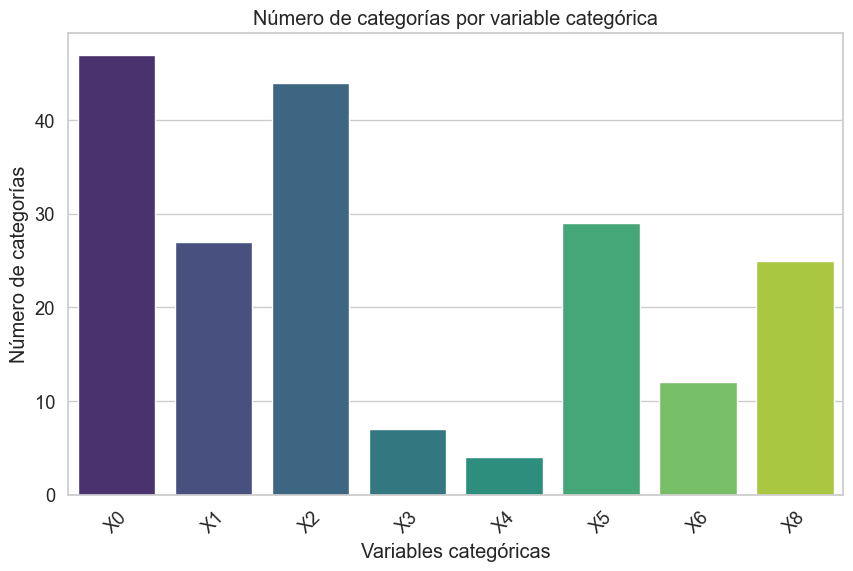

Resumen de variables categóricas:


,Número de Categorías,Categorías
X0,47,"[k, az, t, al, o, w, j, h, s, n, ay, f, x, y, ..."
X1,27,"[v, t, w, b, r, l, s, aa, c, a, e, h, z, j, o,..."
X2,44,"[at, av, n, e, as, aq, r, ai, ak, m, a, k, ae,..."
X3,7,"[a, e, c, f, d, b, g]"
X4,4,"[d, b, c, a]"
X5,29,"[u, y, x, h, g, f, j, i, d, c, af, ag, ab, ac,..."
X6,12,"[j, l, d, h, i, a, g, c, k, e, f, b]"
X8,25,"[o, x, e, n, s, a, h, p, m, k, d, i, v, j, b, ..."



Conteo de cada categoría en cada variable categórica:


,X0,X1,X2,X3,X4,X5,X6,X8
z,360.0,46.0,19.0,-,-,-,-,-
ak,349.0,-,265.0,-,-,-,-,-
y,324.0,23.0,11.0,-,-,1.0,-,116.0
ay,313.0,-,54.0,-,-,-,-,-
t,306.0,31.0,29.0,-,-,-,-,119.0
x,300.0,-,10.0,-,-,2.0,-,105.0
o,269.0,82.0,1.0,-,-,20.0,-,163.0
f,227.0,23.0,87.0,1076.0,-,7.0,20.0,243.0
n,195.0,19.0,137.0,-,-,212.0,-,242.0
w,182.0,52.0,-,-,-,231.0,-,196.0


In [68]:
# Lista de variables categóricas
categorical_cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

# Llamada a la función
categorias_info(train, categorical_cols)


———
### Correlaciones respecto a Y (solo variables numéricas)

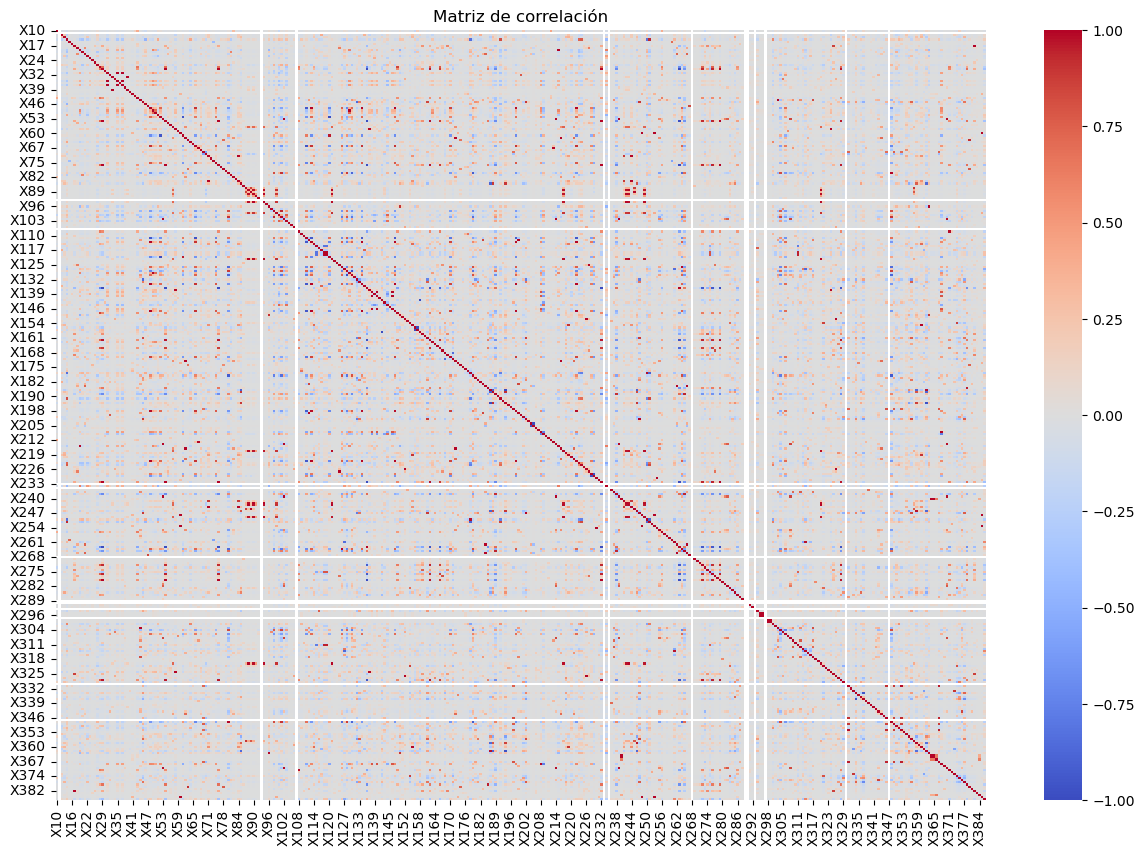

In [28]:
# Ver correlaciones con y (solo numéricas)
numeric_cols = [col for col in train.columns if train[col].dtype != 'object' and col not in ['y','ID']]
corr = train[numeric_cols + ['y']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Matriz de correlación')
plt.show()


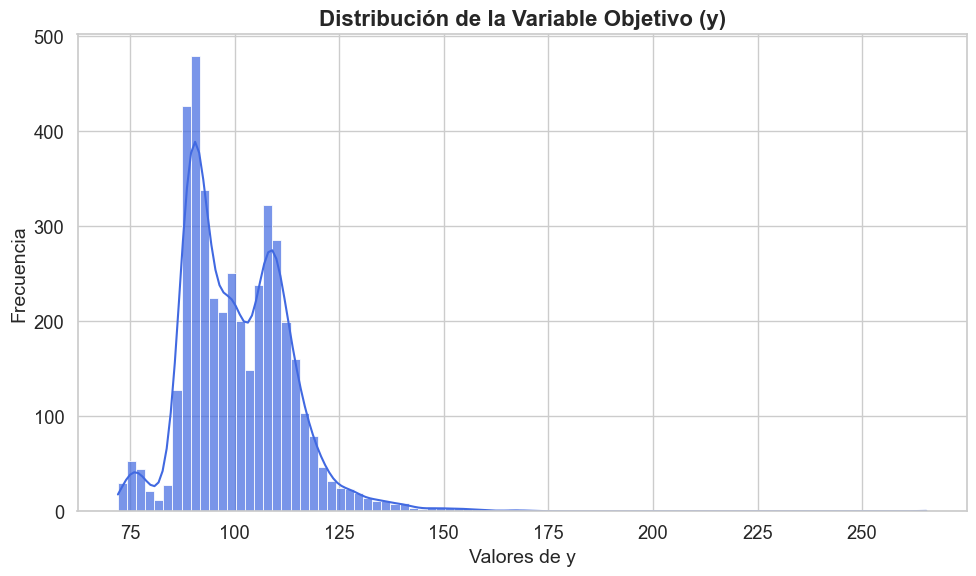

In [74]:
# Configuración del estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Crear la figura
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la gráfica

# Histograma con KDE
sns.histplot(train['y'], kde=True, color="royalblue", bins=89, alpha=0.7)

# Mejorar título y etiquetas
plt.title('Distribución de la Variable Objetivo (y)', fontsize=16, fontweight='bold')
plt.xlabel('Valores de y', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

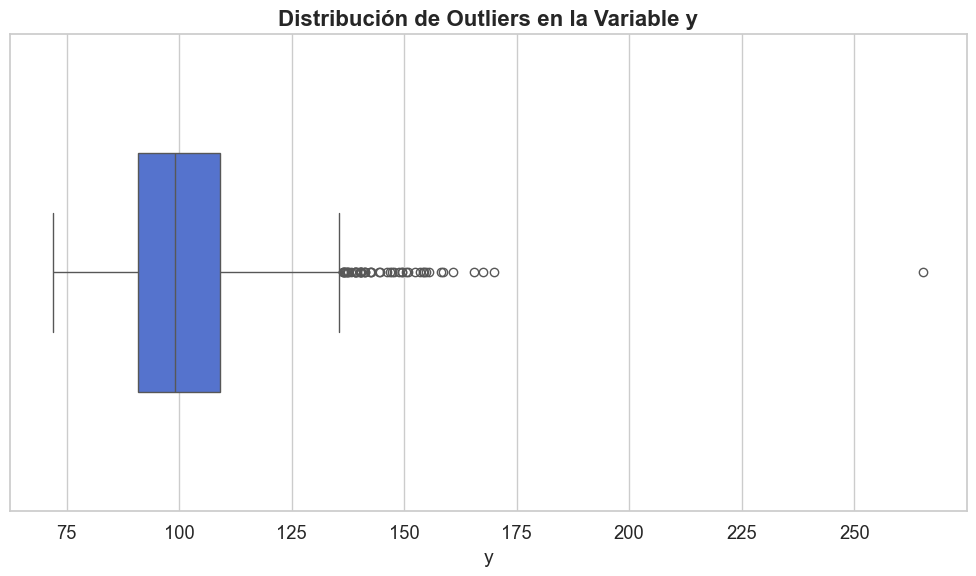

In [38]:
# Configuración del estilo y tamaño
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño de la figura

# Boxplot con personalización
sns.boxplot(x=train['y'], color="royalblue", width=0.5)

# Mejoramos título y etiquetas
plt.title('Distribución de Outliers en la Variable y', fontsize=16, fontweight='bold')
plt.xlabel('y', fontsize=14)
plt.tight_layout()  # Evita que se recorten elementos

# Mostrar la gráfica
plt.show()

---

# **02_Feature_Engineering**

In [75]:
import pandas as pd

# Cargar datos
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

# Separar la variable objetivo
y_train = train['y']
train.drop(['y'], axis=1, inplace=True)

# Identificar columnas categóricas
cat_cols = [col for col in train.columns if train[col].dtype == 'object']

# Aplicar One-Hot Encoding
train_encoded = pd.get_dummies(train, columns=cat_cols, drop_first=True)
test_encoded = pd.get_dummies(test, columns=cat_cols, drop_first=True)

# Alinear columnas entre train y test (importante para evitar problemas de tamaño)
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Restaurar la variable objetivo en train
train_encoded['y'] = y_train

# Guardar los datos preprocesados
train_encoded.to_csv('../data/processed/train_processed.csv', index=False)
test_encoded.to_csv('../data/processed/test_processed.csv', index=False)


In [47]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

# Separar la variable objetivo
y_train = train['y']
train.drop(['y'], axis=1, inplace=True)

# Identificar columnas categóricas
cat_cols = [col for col in train.columns if train[col].dtype == 'object']

# Aplicar Label Encoding a cada columna categórica
for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]], axis=0))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# Opcional: eliminar columnas con poca varianza
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(threshold=0.0)
# train_reduced = selector.fit_transform(train)
# test_reduced = selector.transform(test)

# Guardar el preprocesado
train['y'] = y_train
train.to_csv('../data/processed/train_processed.csv', index=False)
test.to_csv('../data/processed/test_processed.csv', index=False)


Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)


# **03_Model_Training**

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb

# Cargar datasets procesados
train = pd.read_csv('../data/processed/train_processed.csv')
test = pd.read_csv('../data/processed/test_processed.csv')

X = train.drop(['ID','y'], axis=1)
y = train['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo simple: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)
print("R2 - Linear Regression:", r2_score(y_val, y_pred_val))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_val = rf.predict(X_val)
print("R2 - Random Forest:", r2_score(y_val, y_pred_val))

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_val = xgb_model.predict(X_val)
print("R2 - XGBoost:", r2_score(y_val, y_pred_val))


R2 - Linear Regression: -2.5515201504809637e+22
R2 - Random Forest: 0.45368204523098465
R2 - XGBoost: 0.47614738908422194


### Old
R2 - Linear Regression: -5.861638430258711e+17

R2 - Random Forest: 0.47677223184652995

R2 - XGBoost: 0.4493248093845822

---

# **04_Model_Ensembling**

In [78]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import xgboost as xgb

# Cargar datos procesados
train = pd.read_csv('../data/processed/train_processed.csv')
test = pd.read_csv('../data/processed/test_processed.csv')

# Separar variables
X = train.drop(['ID', 'y'], axis=1)
y = train['y']

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelos base por separado

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
print("R2 - Linear Regression:", r2_score(y_val, y_pred_lr))

# 2. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("R2 - Random Forest:", r2_score(y_val, y_pred_rf))

# 3. XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
print("R2 - XGBoost:", r2_score(y_val, y_pred_xgb))

# =====================================================
# Enfoque 1: Blending (promedio simple o ponderado)
# =====================================================

# Promedio simple de RF y XGB, ya que LR mostró pobre rendimiento
y_pred_blend = (y_pred_rf + y_pred_xgb) / 2.0
print("R2 - Blending (RF + XGB):", r2_score(y_val, y_pred_blend))

# Se puede intentar agregar LR con un peso menor, por ejemplo:
# y_pred_blend_all = (0.5 * y_pred_rf) + (0.5 * y_pred_xgb) + (0.0 * y_pred_lr)
# Ajustar los pesos según resultados
# print("R2 - Blending (RF + XGB + LR):", r2_score(y_val, y_pred_blend_all))

# =====================================================
# Enfoque 2: Stacking
# =====================================================
from sklearn.ensemble import StackingRegressor

# Definir los estimadores base
base_estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(random_state=42))
    # Podríamos incluir LR si quisiéramos:
    # ('lr', LinearRegression())
]

# Meta-modelo: podemos usar un modelo lineal o uno más complejo
meta_model = LinearRegression()

stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False,  # Si True, las features originales se añaden además de las predicciones base
    cv=5,
    n_jobs=-1
)

stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_val)
print("R2 - Stacking (RF + XGB -> LR):", r2_score(y_val, y_pred_stack))

# =====================================================
# Selección del mejor método
# =====================================================

# Compara las puntuaciones:
print("R2_RF:", r2_score(y_val, y_pred_rf))
print("R2_XGB:", r2_score(y_val, y_pred_xgb))
print("R2_Blending (RF+XGB):", r2_score(y_val, y_pred_blend))
print("R2_Stacking:", r2_score(y_val, y_pred_stack))

# Si Stacking o el Blending mejora el resultado, podemos usar ese modelo final.
# Si no mejora, probar otros meta-modelos (por ejemplo, Ridge, Lasso, GradientBoostingRegressor)
# o cambiar las configuraciones de RF/XGB, hacer hyperparameter tuning, etc.

# =====================================================
# Predicción en Test y Submission (opcional aquí)
# =====================================================
# Escogemos el mejor modelo (ej: el stacking si es el mejor)
best_model = stack

X_test = test.drop(['ID'], axis=1)
y_test_pred = best_model.predict(X_test)

submission = pd.DataFrame({'ID': test['ID'], 'y': y_test_pred})
submission.to_csv('submission_ensemble.csv', index=False)


R2 - Linear Regression: -2.5515201504809637e+22
R2 - Random Forest: 0.45368204523098465
R2 - XGBoost: 0.47614738908422194
R2 - Blending (RF + XGB): 0.4785728252160508
R2 - Stacking (RF + XGB -> LR): 0.4856114119630647
R2_RF: 0.45368204523098465
R2_XGB: 0.47614738908422194
R2_Blending (RF+XGB): 0.4785728252160508
R2_Stacking: 0.4856114119630647


### Old

R2 - Linear Regression: -2.5515201504809637e+22

R2 - Random Forest: 0.45368204523098465

R2 - XGBoost: 0.47614738908422194

R2 - Blending (RF + XGB): 0.4785728252160508

R2 - Stacking (RF + XGB -> LR): 0.4856114119630647

R2_RF: 0.45368204523098465

R2_XGB: 0.47614738908422194

R2_Blending (RF+XGB): 0.4785728252160508

R2_Stacking: 0.4856114119630647

In [79]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import r2_score
import xgboost as xgb

# Cargar datos procesados
train = pd.read_csv('../data/processed/train_processed.csv')
test = pd.read_csv('../data/processed/test_processed.csv')

X = train.drop(['ID', 'y'], axis=1)
y = train['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# Hyperparameter Tuning para RandomForest
# =========================
param_dist_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist_rf,
    n_iter=20, 
    scoring='r2', 
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print("Mejores parámetros RF:", rf_search.best_params_)
print("Mejor R2 CV RF:", rf_search.best_score_)

# =========================
# Hyperparameter Tuning para XGBoost
# =========================
param_dist_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42, tree_method='hist')
xgb_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
print("Mejores parámetros XGB:", xgb_search.best_params_)
print("Mejor R2 CV XGB:", xgb_search.best_score_)

# =========================
# Stacking con modelos optimizados
# =========================
base_estimators = [
    ('rf', best_rf),
    ('xgb', best_xgb)
]

# Probar con Ridge en lugar de LinearRegression como meta-modelo
meta_model = Ridge(alpha=1.0)

# Stacking
stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_val)
print("R2 - Stacking (Optimized RF + Optimized XGB -> Ridge):", r2_score(y_val, y_pred_stack))

# Si aún no alcanzas 0.55, considera:
# - Añadir LightGBM o CatBoost
# - Probar más combinaciones de hiperparámetros
# - Hacer más feature engineering
# - Normalizar/estandarizar los datos
# - Re-intentar con un meta-modelo distinto (XGB como meta-modelo, LightGBM como meta-modelo, etc.)

# Predicción final en test
X_test = test.drop(['ID'], axis=1)
y_test_pred = stack.predict(X_test)

submission = pd.DataFrame({'ID': test['ID'], 'y': y_test_pred})
submission.to_csv('submission_ensemble_optimized.csv', index=False)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros RF: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Mejor R2 CV RF: 0.5479914849118414
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros XGB: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Mejor R2 CV XGB: 0.5605969154461506
R2 - Stacking (Optimized RF + Optimized XGB -> Ridge): 0.6006642650878353


In [82]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.base import clone

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# ====================================================
# Cargar datos
# ====================================================
train = pd.read_csv('../data/processed/train_processed.csv')
test = pd.read_csv('../data/processed/test_processed.csv')

X = train.drop(['ID', 'y'], axis=1)
y = train['y']
X_test = test.drop(['ID'], axis=1)

# ====================================================
# Funciones Auxiliares
# ====================================================
def report_cv_results(model, X, y, cv=5):
    """
    Calcula el R² medio y por fold para verificar sobreajuste.
    Retorna la media y el detalle por fold.
    """
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    fold_scores = []
    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        model_fit = clone(model).fit(X_tr, y_tr)
        y_pred_val = model_fit.predict(X_val)
        fold_scores.append(r2_score(y_val, y_pred_val))
    return np.mean(fold_scores), fold_scores

def grid_search_report(model, param_grid, X, y, cv=5):
    """
    Aplica GridSearchCV al modelo y retorna el mejor estimador junto con su score.
    """
    gs = GridSearchCV(model, param_grid=param_grid, scoring='r2', cv=cv, n_jobs=-1, verbose=1)
    gs.fit(X, y)
    print("Mejores parámetros:", gs.best_params_)
    print("Mejor R2 CV:", gs.best_score_)
    return gs.best_estimator_

# ====================================================
# Ajuste de Hiperparámetros para cada modelo base
# ====================================================

# 1. Random Forest
param_grid_rf = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_base = RandomForestRegressor(random_state=42)
best_rf = grid_search_report(rf_base, param_grid_rf, X, y)

# 2. XGBoost
param_grid_xgb = {
    'n_estimators': [500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_base = xgb.XGBRegressor(random_state=42, tree_method='hist')
best_xgb = grid_search_report(xgb_base, param_grid_xgb, X, y)

# 3. LightGBM
param_grid_lgb = {
    'n_estimators': [500, 1000],
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
lgb_base = lgb.LGBMRegressor(random_state=42)
best_lgb = grid_search_report(lgb_base, param_grid_lgb, X, y)

# 4. CatBoost
# Nota: CatBoost es un poco más lento, pero vale la pena probar.
# Se pueden probar menos parámetros para ahorrar tiempo.
param_grid_cat = {
    'iterations': [500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0]
}
cat_base = CatBoostRegressor(random_state=42, silent=True)
best_cat = grid_search_report(cat_base, param_grid_cat, X, y)

# ====================================================
# Evaluar cada modelo individualmente con CV detallado
# ====================================================
for model_name, model in [('RF', best_rf), ('XGB', best_xgb), ('LGB', best_lgb), ('CAT', best_cat)]:
    mean_score, fold_scores = report_cv_results(model, X, y, cv=5)
    print(f"Modelo: {model_name}")
    print("Scores por fold:", fold_scores)
    print("R2 promedio CV:", mean_score)
    # También se puede entrenar con todos los datos y ver R2 en el propio train (aunque esto no es muy significativo):
    model.fit(X, y)
    y_pred_train = model.predict(X)
    print("R2 en todo el train (riesgo de sobrefitting):", r2_score(y, y_pred_train))
    print("================================================")

# ====================================================
# Stacking - combinando los 4 mejores modelos
# Meta-modelo: Ridge (se puede tunear también)
# ====================================================
stack_estimators = [
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('lgb', best_lgb),
    ('cat', best_cat)
]

meta_model = Ridge(alpha=1.0)

stack = StackingRegressor(
    estimators=stack_estimators,
    final_estimator=meta_model,
    passthrough=False,
    cv=5,
    n_jobs=-1
)

mean_stack_score, stack_fold_scores = report_cv_results(stack, X, y, cv=5)
print("R2 CV stacking (RF, XGB, LGB, CAT -> Ridge):", mean_stack_score)
print("Scores por fold stacking:", stack_fold_scores)

# Entrenar el stacking con TODOS los datos para la submission final
stack.fit(X, y)
y_pred_train_stack = stack.predict(X)
print("R2 en todo el train del stacking:", r2_score(y, y_pred_train_stack))

# ====================================================
# Generar submission
# ====================================================
y_test_pred = stack.predict(X_test)
submission = pd.DataFrame({'ID': test['ID'], 'y': y_test_pred})
submission.to_csv('submission_ensemble_optimized.csv', index=False)
print("Submission generada: submission_ensemble_optimized.csv")

# ====================================================
# Notas Adicionales:
# ====================================================
# - Para mejorar aún más:
#   - Ajustar aún más los parámetros de los modelos (por ejemplo, probar más valores).
#   - Añadir más modelos, o más capas de stacking.
#   - Probar meta-modelos diferentes: Lasso, ElasticNet, XGBoost como meta-modelo, etc.
#   - Probar más ingeniería de características: 
#       * Normalizaciones, 
#       * Transformaciones log en y o en variables,
#       * Seleccionar sólo las features más relevantes,
#       * Generar nuevas features.
#   - Aumentar el n_iter del GridSearch (o usar RandomizedSearch con más iteraciones) para encontrar mejores parámetros.
#   - Repetir el proceso varias veces con distintas semillas.
# - Con esfuerzo, iteraciones y más afinamiento, es posible subir el R² en el local y en Kaggle.


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mejor R2 CV: 0.5509175555475652
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Mejor R2 CV: 0.5694133725222146
Fitting 5 folds for each of 48 candidates, totalling 240 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGSEGV(-11)}

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.base import clone

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# ====================================================
# Cargar datos
# ====================================================
train = pd.read_csv('../data/processed/train_processed.csv')
test = pd.read_csv('../data/processed/test_processed.csv')

X = train.drop(['ID', 'y'], axis=1)
y = train['y']
X_test = test.drop(['ID'], axis=1)

# ====================================================
# Funciones Auxiliares
# ====================================================
def report_cv_results(model, X, y, cv=5):
    """
    Calcula el R² medio y por fold.
    """
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    fold_scores = []
    for train_idx, val_idx in kf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        model_fit = clone(model).fit(X_tr, y_tr)
        y_pred_val = model_fit.predict(X_val)
        fold_scores.append(r2_score(y_val, y_pred_val))
    return np.mean(fold_scores), fold_scores

def random_search_report(model, param_dist, X, y, cv=5, n_iter=20):
    """
    Aplica RandomizedSearchCV al modelo y retorna el mejor estimador junto con su score.
    """
    rs = RandomizedSearchCV(model, param_distributions=param_dist,
                            n_iter=n_iter, scoring='r2', cv=cv, 
                            n_jobs=1, # reducir el paralelismo para evitar TerminatedWorkerError
                            verbose=1, random_state=42)
    rs.fit(X, y)
    print("Mejores parámetros:", rs.best_params_)
    print("Mejor R2 CV:", rs.best_score_)
    return rs.best_estimator_


# ====================================================
# Ajuste de Hiperparámetros para modelos base
# Usar RandomizedSearchCV con menos parámetros
# ====================================================

# Random Forest (ya tienes un set de parámetros bueno, se puede mantener o reducir)
param_dist_rf = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}
rf_base = RandomForestRegressor(random_state=42)
best_rf = random_search_report(rf_base, param_dist_rf, X, y, n_iter=10)

# XGBoost
param_dist_xgb = {
    'n_estimators': [500, 1000],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_base = xgb.XGBRegressor(random_state=42, tree_method='hist')
best_xgb = random_search_report(xgb_base, param_dist_xgb, X, y, n_iter=10)

# LightGBM - reducir la complejidad
param_dist_lgb = {
    'n_estimators': [500, 1000],
    'num_leaves': [31, 63],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
lgb_base = lgb.LGBMRegressor(random_state=42)
best_lgb = random_search_report(lgb_base, param_dist_lgb, X, y, n_iter=10)

# CatBoost
param_dist_cat = {
    'iterations': [500, 1000],
    'depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0]
}
cat_base = CatBoostRegressor(random_state=42, silent=True)
best_cat = random_search_report(cat_base, param_dist_cat, X, y, n_iter=10)


# ====================================================
# Evaluar cada modelo individualmente con CV detallado
# ====================================================
for model_name, model in [('RF', best_rf), ('XGB', best_xgb), ('LGB', best_lgb), ('CAT', best_cat)]:
    mean_score, fold_scores = report_cv_results(model, X, y, cv=5)
    print(f"Modelo: {model_name}")
    print("Scores por fold:", fold_scores)
    print("R2 promedio CV:", mean_score)
    model.fit(X, y)
    y_pred_train = model.predict(X)
    print("R2 en todo el train:", r2_score(y, y_pred_train))
    print("================================================")

# ====================================================
# Stacking - combinando los 4 modelos
# ====================================================
from sklearn.ensemble import StackingRegressor

stack_estimators = [
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('lgb', best_lgb),
    ('cat', best_cat)
]

meta_model = Ridge(alpha=1.0)

stack = StackingRegressor(
    estimators=stack_estimators,
    final_estimator=meta_model,
    passthrough=False,
    cv=5,
    n_jobs=1 # evitar problemas de memoria
)

mean_stack_score, stack_fold_scores = report_cv_results(stack, X, y, cv=5)
print("R2 CV stacking (RF, XGB, LGB, CAT -> Ridge):", mean_stack_score)
print("Scores por fold stacking:", stack_fold_scores)

stack.fit(X, y)
y_pred_train_stack = stack.predict(X)
print("R2 en todo el train del stacking:", r2_score(y, y_pred_train_stack))

# ====================================================
# Generar submission
# ====================================================
y_test_pred = stack.predict(X_test)
submission = pd.DataFrame({'ID': test['ID'], 'y': y_test_pred})
submission.to_csv('submission_ensemble_optimized.csv', index=False)
print("Submission generada: submission_ensemble_optimized.csv")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Mejor R2 CV: 0.5495827094171519
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Mejor R2 CV: 0.5690325325389827
Fitting 5 folds for each of 10 candidates, totalling 50 fits


### Old

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros RF: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}

Mejor R2 CV RF: 0.5479914849118414

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros XGB: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Mejor R2 CV XGB: 0.5605969154461506

R2 - Stacking (Optimized RF + Optimized XGB -> Ridge): 0.6006642650878353

# **05_Submission.ipynb**

In [ ]:
test = pd.read_csv('../data/processed/test_processed.csv')

X_test = test.drop(['ID'], axis=1)

# Suponiendo que el mejor modelo fue xgb_model
y_test_pred = xgb_model.predict(X_test)

submission = pd.DataFrame({'ID': test['ID'], 'y': y_test_pred})
submission.to_csv('submission.csv', index=False)